# 0. Import libraries



In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.optimizers import Adamax
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

# 1. Get data

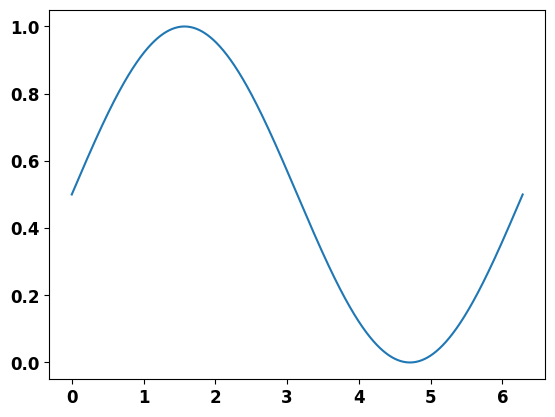

In [2]:
# make wavyboi
sinLength = 10000
x = np.linspace(0,2*math.pi,sinLength)
y = (np.sin(x)+1)/2

plt.figure()
plt.plot(x,y)

x = pd.DataFrame(x)
y = pd.DataFrame(y)

# 2. Model

In [3]:
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation ='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(40, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 40)                840       
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [4]:
optimizer = SGD(learning_rate = 0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

history = model.fit(x, y, epochs=100, batch_size=300)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0476 - mean_squared_error: 0.0476
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0377 - mean_squared_error: 0.0377
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 7/100
34/34 [==============================] - 2s 75ms/step - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 10/100
34/34

313/313 [==============================] - 1s 2ms/step


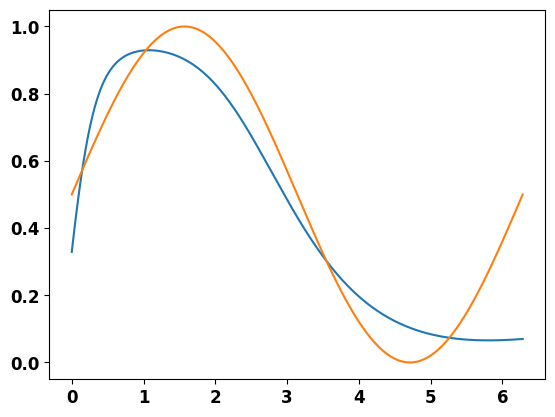

In [5]:
prediction = model.predict(x)

plt.figure()
plt.plot(x,prediction,x,y)

# Task 2 Handwritten digits



## 0. Libraries

In [19]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical

## 1.Data

In [20]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

## 2. Preprocess

In [21]:
x_train = x_train/255-0.5
x_test = x_test/255-0.5

x_train = np.expand_dims(x_train,axis=3)
x_test = np.expand_dims(x_test,axis=3)

## 3. Model

In [22]:
model = Sequential([
    layers.Conv2D(64, 3, input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [23]:
model.fit(x_train,to_categorical(y_train),epochs=3,validation_data=(x_test, to_categorical(y_test)),)

Epoch 1/3
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2303 - accuracy: 0.9336 - val_loss: 0.1078 - val_accuracy: 0.9681
Epoch 2/3
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0949 - accuracy: 0.9719 - val_loss: 0.0824 - val_accuracy: 0.9752
Epoch 3/3
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0719 - val_accuracy: 0.9771


In [26]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:20])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:20]) # [7, 2, 1, 0, 4]

1/1 [==============================] - 1s 582ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
